## Coding Exercise

Create a function called `vowelCheck` that returns true if a string called `s` contains more than one vowel, and returns `false` if it is made solely of consonants. 

You will use a provided list called `vowels` which includes all vowels.

Complete your work in the file labeled `lab_exercise.ipynb`.

Example 1:
```
Input: s = "hello"
Output: True
Explanation: "e" and "o" are vowels.
```

Example 2:
```
Input: s = "rhythms"
Output: False
Explanation: Only consonants present.
```

## 26. Remove Duplicates from Sorted Array

Given an integer array nums sorted in non-decreasing order, remove the duplicates in-place such that each unique element appears only once. The relative order of the elements should be kept the same.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.

Return k after placing the final result in the first k slots of nums.

Do not allocate extra space for another array. You must do this by modifying the input array in-place with O(1) extra memory.

Custom Judge:

The judge will test your solution with the following code:
```
int[] nums = [...]; // Input array
int[] expectedNums = [...]; // The expected answer with correct length

int k = removeDuplicates(nums); // Calls your implementation

assert k == expectedNums.length;
for (int i = 0; i < k; i++) {
    assert nums[i] == expectedNums[i];
}
```

If all assertions pass, then your solution will be accepted.

Example 1:
```
Input: nums = [1,1,2]
Output: 2, nums = [1,2,_]
Explanation: Your function should return k = 2, with the first two elements of nums being 1 and 2 respectively.
It does not matter what you leave beyond the returned k (hence they are underscores).
```

Example 2:
```
Input: nums = [0,0,1,1,1,2,2,3,3,4]
Output: 5, nums = [0,1,2,3,4,_,_,_,_,_]
Explanation: Your function should return k = 5, with the first five elements of nums being 0, 1, 2, 3, and 4 respectively.
It does not matter what you leave beyond the returned k (hence they are underscores).
```

https://leetcode.com/problems/remove-duplicates-from-sorted-array/

## Grouping

Grouping allows us to establish different groups on data and then compute specific aggregates.

Previously, we’ve created separate dataframes and filtered for each year, but in this case we can utilize a built-in function called “groupby”

While printing this variable does not give us any descriptive information, we can figure out which groups were formed from this operation.


In [38]:
import pandas as pd

df = pd.read_csv("../data/imdb_processed.csv")

groups = df.groupby("year")
groups.groups

,index,rating,vote,runtime
year,,,,
1905,4092.600000,NaN,NaN,93.000000
1910,5219.000000,NaN,NaN,103.000000
1913,7390.000000,NaN,NaN,NaN
1914,7483.000000,6.300000,1022.000000,NaN
1916,1496.000000,7.700000,14949.000000,95.000000
...,...,...,...,...
2001,4191.786517,6.496013,15814.732558,104.717391
2002,4054.802488,6.492532,14704.818182,100.444874
2003,3978.229868,6.615420,16482.807634,97.314387



We can hone into the specific group we need by accessing the value of a specific key.

In [18]:
groups.get_group(1905)

,index,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
232,232,Battalion of Seaforth Highlanders at the Dubli...,1905,movie,"['Documentary', 'Short']",NaN,NaN,['United States'],"['None', 'English']",NaN,NaN,NaN,NaN,72.0
270,270,Battalion of Seaforth Highlanders at the Dubli...,1905,movie,"['Documentary', 'Short']",NaN,NaN,['United States'],"['None', 'English']",NaN,NaN,NaN,NaN,120.0
3472,3472,Battalion of Seaforth Highlanders at the Dubli...,1905,movie,"['Documentary', 'Short']",NaN,NaN,['United States'],"['None', 'English']",NaN,NaN,NaN,NaN,87.0
8055,8055,Battalion of Seaforth Highlanders at the Dubli...,1905,movie,"['Documentary', 'Short']",NaN,NaN,['United States'],"['None', 'English']",NaN,NaN,NaN,NaN,NaN
8434,8434,Battalion of Seaforth Highlanders at the Dubli...,1905,movie,"['Documentary', 'Short']",NaN,NaN,['United States'],"['None', 'English']",NaN,NaN,NaN,NaN,NaN


For our question:


Did average ratings of movies increase or decrease for each year?
We will utilize our builtin methods once again to calculate the means for each group.


<AxesSubplot:xlabel='year'>

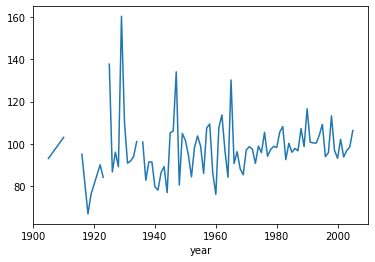

In [41]:
movies = df[df["kind"] == "movie"]

means = movies.groupby("year")["runtime"].mean()
means.plot()